In [1]:
import statsmodels


# Statsmodels timeseries analysis


##Todo
make different classifiers for each year, look which years are most similar, use model only for nearest years. Maybe use EM for that

compute priors for traps/locations

http://www.pymix.org/pymix/index.php?n=PyMix.Tutorial

check this out for EM, maybe over yhat?!

## is there such a thing
as sinoid stretch of the space? if so, we can probably use linreg better!

get prior: Look at "plotmelike".That counting can work really well, create prior distribution for every variable, use it as feature grpupby([WnvPresent,Feature]).count() -> assign 0/1 then divide 1/0 (build prior +1/+n). try submitting linear combination of priors(which basically means naive bayes ) .

Definitely work in frequency domain, idiot.

specisprior = df.groupby(['Species'])['WnvPresent'].sum()/df.groupby(['Species'])['WnvPresent'].count()

sum over all priors = NaiveBayes. Generally: Put putcomes of one classifier into the feature set of the last one. Of course for that, you need to .predict proba() from the Training set (just use without y!)

'Deep': Use ONLY probas from previos classifiers as features!

forestclassifier.fit([Naivebayes.predict_proba, Logreg.predi
ct_proba, .....])

#Statsmodel Train_example

In [42]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [48]:
dta = sm.datasets.sunspots.load_pandas().data
df = pd.read_csv('../Data_with_NumMosquitos/aggregated_train_NumMosquito_no_strings.csv')
y = pd.DataFrame(df['NumMosquitos'],columns=['NumMosquitos'])
y['Date'] = df['Date']


In [49]:
dta.head()

,YEAR,SUNACTIVITY
0,1700,5
1,1701,11
2,1702,16
3,1703,23
4,1704,36


In [50]:
y.head()

,NumMosquitos,Date
0,1,2007-05-29
1,1,2007-05-29
2,1,2007-05-29
3,1,2007-05-29
4,4,2007-05-29


In [54]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
y.index = y.Date# pd.Index(sm.tsa.datetools.dates_from_range('2007', '2013'))
del dta["YEAR"]


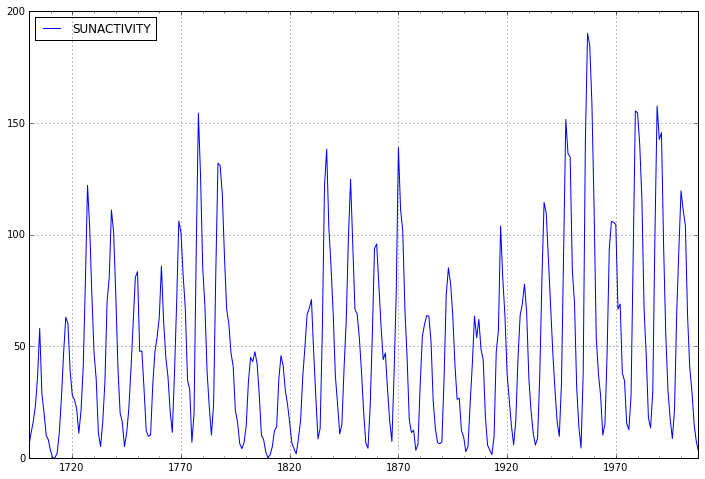

In [25]:
dta.plot(figsize=(12,8));


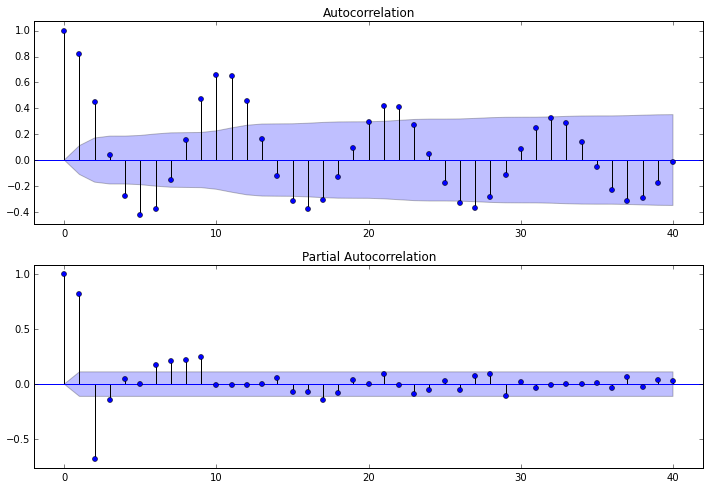

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [58]:
del y['Date']

In [60]:
len(y)

10506

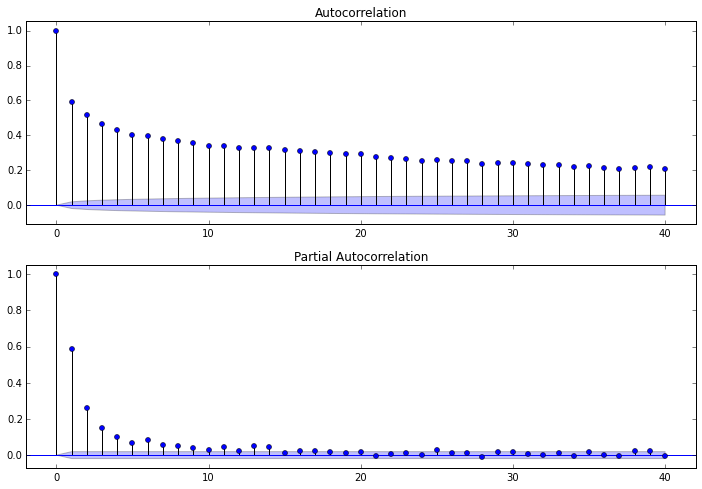

In [59]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax2)